# Tabular Data

## Outline

* Intro Tabular data
* Intro to Pandas
    - Series / Dataframe / Indices
    - Reading data
    - Basic Operations
* Pandas: performance and memory management

# 1. Intro Tabular data

## Anatomy of a table
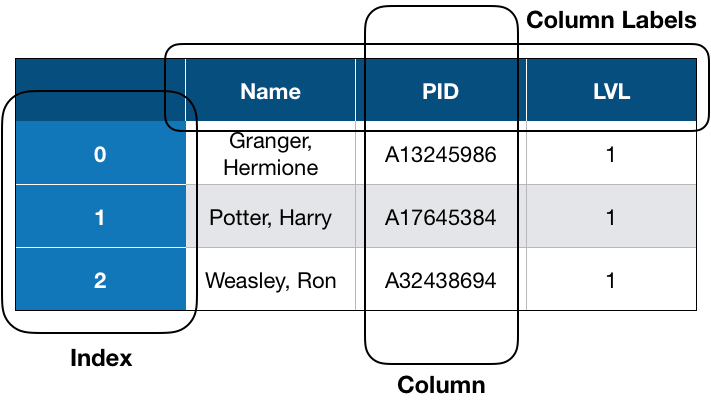

## Storing data in tabular format
* Rows consist of different attributes for a single individual.
* Columns consist of all measurements of a certain attribute.

## Anatomy of a table
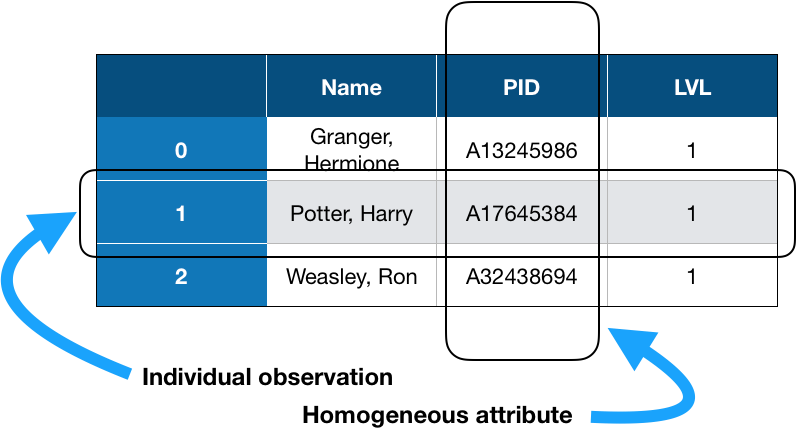

## Row and column selection

**Example**: You have a dataset that lists different cities, temperatures and the corresponding dates for each temperature. Cities may occur multiple times. You are interested in the max temperature in each city.

We can select individual columns (i.e. cities and temps only) by their labels or individual rows by their indices.


## Filtering and querying rows

For example, we can choose some rows based on certain condition. For the example with cities, temperatures and dates, we can select rows for a specific month. 


## Grouping: split-apply-combine

**Idea**: break up a large problem into smaller pieces, operate on each piece independently and then put all the pieces back together.

**Example**: You have a dataset that lists different cities, temperatures and the corresponding dates for each temperature. Cities may occur multiple times. You are interested in the max temperature in each city. 

**Solution steps** 
1. Group the data by city. It produces multiple tables (splits)
2. Then you run your analysis for each table i.e. find max temperature. (apply)
3. Combine the results into another table. (combine)


## Merge/join/concatenating tables

**General Idea**

Different ways to combine tables. Imagine that we have another table that lists cities and their most popular point of interest. It is possible to combine the original table with a new one producing a single table that unites the entries from both table. 


# 2. Intro to Pandas


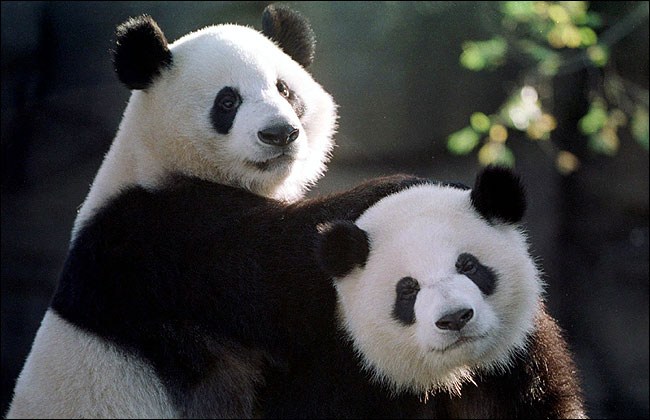

# Pandas
* Python library for reading "Panel Data"
* Similar to `data.table` in `R`; `dataframe` in `spark`.

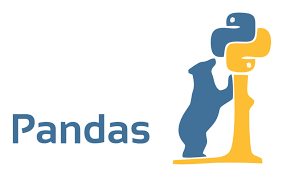

### Pandas History

* Old workflow: Use multiple languages (python, R, java) in single project.
* New workflow: Do everything in python!
    - Faster to develop than java;
    - More production capable than R


### Pandas History

* Pandas was created to fill a gap in data manipulation capabilities.
    - Hodgepodge of features of other succesful libraries (e.g. from `R`)
    - Ad-hoc, still evolving design.
    - Great for prototyping.

## Pandas Data Structures:
1. Data Frame: 2 dimensional tables
2. Series: 1 dimensional (columnar) array
3. Index: immutable sequence of column/row labels

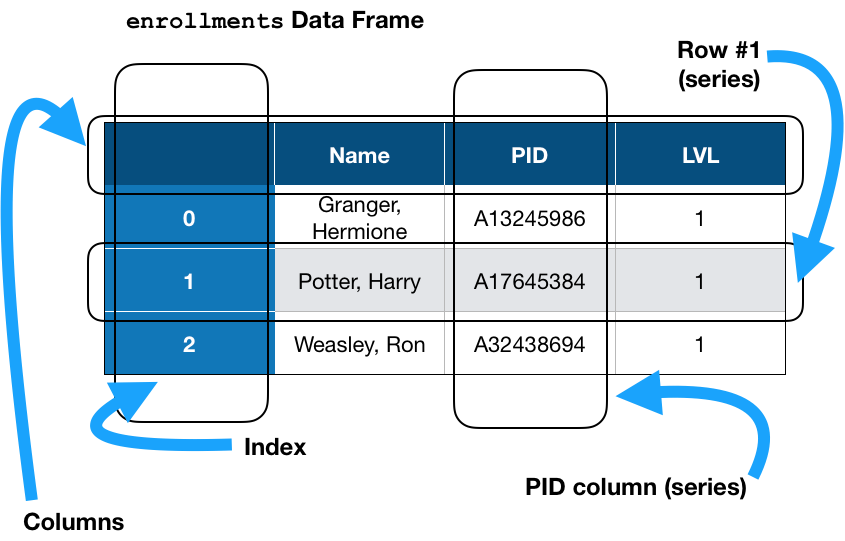

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np

## 1-dimensional slices of tables
* Rows and columns of data frames are represented by `pd.Series`.
* A `pd.Series` object is a one-dimensional with labels (index).
* Optional (default) arguments:
    - `index` (does not have to be numeric),  `name`

In [ ]:
row_data = pd.Series([10, 23, 45, 53, 87])
row_data

In [ ]:
row_data_index = pd.Series([10, 23, 45, 53, 87],index=['a', 'b', 'c', 'd', 'e'])
row_data_index

# `DataFrame` Constructor

* `pd.DataFrame` creates a data frame from: 
    - a list of rows
    - a dictionary of columns
* Optional (default) arguments:
    - `index`, `columns`, `dtype`

In [ ]:
row_data = [
    ['Granger, Hermione', 'A13245986', 1],
    ['Potter, Harry', 'A17645384', 1],
    ['Weasley, Ron', 'A32438694', 1],
    ['Longbottom, Neville', 'A52342436', 1]
]

row_data

In [ ]:
enrollments = pd.DataFrame(row_data, columns = ['Name', 'PID', 'LVL'])
enrollments

In [ ]:
column_dict = {
    'Name': ['Granger, Hermione', 'Potter, Harry', 'Weasley, Ron', 'Longbottom, Neville'],
    'PID': ['A13245986', 'A17645384', 'A32438694', 'A52342436'],
    'LVL': [1, 1, 1, 1]
}
column_dict

In [ ]:
enrollments = pd.DataFrame(column_dict)
enrollments

# `DataFrame` Constructor

* accepts any 'array-like' container (`list`, `np.ndarray`, `pd.Series`)
* **Advice**: create small DataFrames to debug/understand your code!

### `DataFrame` index
* Accessed using the `index` attribute
* Defaults to the row number (0-indexed)
    - doesn't need to be numeric!
* A new index is set using `set_index(col)` method

In [ ]:
# look at index

enrollments.index

In [ ]:
# set PID to index

idx_with_pid = enrollments.set_index('PID', drop = True)
idx_with_pid

In [ ]:
idx_with_pid.index

### `DataFrame` column labels
* accessed using the `columns` attribute
* columns default to column number (0-indexed)
* A column is an `Index` object
    - what is an index for?

In [ ]:
enrollments.columns

## Axis 

The rows and columns of a `pd.DataFrame` are both `pd.Series`.

The *axis* specifies the direction of a slice of a table.

* A slice along the:
    - 0-axis is a Series labeled by the *row* index of the dataframe.
    - 1-axis is a Series labeled by the *columns* (index) of the the dataframe.


# Selecting Rows and Columns with `[]`

### Selecting columns of a `DataFrame` using `[]`
* Access a column using the `[]` operator.
* Specifying a column name returns the column as a series.
    - an `axis=0` slice!
* Specifying a list of column names returns a data frame.

In [ ]:
enrollments

In [ ]:
# returns series

enrollments['Name']

In [ ]:
# returns a data frame

enrollments[['Name', 'PID']]

In [ ]:
# What is the output? Table or array?

enrollments[['Name']]

In [ ]:
# Note that we can also use the to_frame method to turn a Series into a DataFrame.

enrollments['Name'].to_frame()

### Select rows of a `DataFrame` with `[]`
* Select slices using `[i:j]` syntax
* Select using boolean arrays

### Slicing the rows of a `DataFrame`
* Select slices using `[i:j]` syntax
* non-inclusive row slicing as python lists

In [ ]:
# How many rows are in the output?

enrollments[:2]

In [ ]:
enrollments[1:-1]

## Boolean Array Selection

* The `[]` operator also supports boolean arrays as input. 
* The array must be exactly as long as the number of rows. 
* The result is a filtered version of the data frame, where only rows corresponding to `True` appear.

In [ ]:
enrollments

In [ ]:
bool_arr = [
    False,  # Hermione
    True,   # Harry
    False,  # Ron
    True    # Neville
]

enrollments[bool_arr]

### Boolean arrays via conditions
* Select all Hogwarts whose last names begin with A-L

In [ ]:
bool_arr = enrollments['Name'] < 'M'
bool_arr

In [ ]:
enrollments[bool_arr]

### Discussion Questions

For the data frame given below, what do each of the following return?
```
jack[1]
jack[1:]
jack['1']
jack[[1,1]]
```

In [ ]:
jack = pd.DataFrame({1: ['fee', 'fi'], '1': ['fo', 'fum']})
jack

## Warning: Pandas lets you do stupid things
* Don't use duplicate column names!
* Don't use Booleans for column names!
* Don't do them!

### So, you have duplicate column names?
* Don't do this!

In [ ]:
df = pd.DataFrame([[0,1],[3,4]], columns=['a', 'a'])
df

In [ ]:
# returns a dataframe?!!
df['a']

### So, you have duplicate column names?
* Selection by labels has unintended consequences
* File readers don't allow this behavior.
* Pandas allows this as columns are transposed row indices
    - duplicate row indices are *useful*
* Use column *index* to fix this (`iloc`).

### So, your column names are boolean?

In [ ]:
df = pd.DataFrame([[0,1,4], [3,4,2], [0,5,8]], columns = [True, False, False])
df

In [ ]:
# Grab column `True`
df[True]

In [ ]:
# take first two rows with boolean indices
df[[True, True, False]]

In [ ]:
# Try to select multiple columns!
# df[[True, False]]

### So, your column names are boolean?
* Columns names can be any (hashable) type.
* Pandas will interpret *any* boolean list as a row selection.
* Don't do this!

# Pandas: File I/O and basic operations

### File I/O (input-output)
* `pd.read_csv` (csv files)

* `pd.read_excel` (excel files)

And *many, many others*.

### `pd.read_csv` reads tabular data
* `pd.read_csv(path, **kwargs)`
* Many optional arguments: see [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [ ]:
# Read in file
elections = pd.read_csv("elections.csv")
elections

In [ ]:
# The read_csv command lets us specify a column to use an index. 
# For example, we could have used Year as the index.
# Note, index does not have to be unique

elections_year_index = pd.read_csv("elections.csv", index_col="Year", nrows=5)
elections_year_index

In [ ]:
# Column labels behave differently. We saw that it is possible to create a table with duplicate names (bad idea!)
# Pandas tries to prevent possible confusion by re-naming the duplicate labels.
# For example, if we try to read in a file for which column names are not unique, 
# Pandas will automatically re-name  any duplicates.

dups = pd.read_csv("duplicate_columns.csv")
dups

In [ ]:
dups_custom_cols = pd.read_csv('duplicate_columns.csv', names=['firstname', 'lastname', 'fruitname', 'flavor'], header=0)
dups_custom_cols

In [ ]:
# saving into csv:

dups_custom_cols.to_csv("Modified.csv", index=False, encoding="utf8")

### Discussion Question

1. What is the output of the cell below? Series or data frame?
2. How many entries does it have?

In [ ]:
elections[[False, False, False, False, False, 
          False, False, True, False, False,
          True, False, False, False, True,
          False, False, False, False, False,
          False, False, True]]

### Discussion Question

Suppose ```iswin = elections['Result'] == 'win'```.

1. What is the output of: ```iswin```
2. What is the output of: ```election[iswin]```

In [ ]:
iswin = elections['Result'] == 'win'
iswin

In [ ]:
elections[iswin]

## Selecting table content with `DataFrame.loc`
* There are a lot of ways to use `loc`, we'll learn them bit-by-bit
* See the [Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html).

### Select a row of a `DataFrame` using an index label
* `DataFrame.loc[idx]` returns a Series describing of a single row.

In [ ]:
elections.head(5)

In [ ]:
elections.loc[0]

### Select rows of a `DataFrame` using a list of labels
* `DataFrame.loc[idx_list]` returns a DataFrame with rows given by `idx_list`


In [ ]:
elections.loc[[0, 1, 2, 3, 4]]

### Select rows of a `DataFrame` using a boolean array
* `DataFrame.loc[bool_arr]` returns a DataFrame consisting of rows where `bool_arr` is `True`.


In [ ]:
elections.loc[[True, True, False, False, True]]

### Selecting groups of rows and columns of a `DataFrame`.
* `DataFrame.loc[idx_list, col_list]` selects rows in `idx_list` and columns in `col_list`.
* `DataFrame.loc[bool_arr, col_list]` selects rows using `bool_arr` and columns in `col_list`.
* Use `DataFrame.loc[:,col_list]` to select all rows.

In [ ]:
elections.loc[[0, 1, 2, 3, 4], ['Candidate','Party', 'Year']]

In [ ]:
elections.loc[:, ['Candidate','Party', 'Year']]

### Other ways of selecting rows and columns
* `loc[bool_arr, bool_arr]` selects both rows and columns using boolean arrays.
* `loc[predicate]` where `predicate` is a function with boolean output.
* `loc[:,colname_i:colname_j]` column name slicing
* `iloc[i,j]` selects rows/columns by row/column number.

See the documentation for more!

In [ ]:
# Loc also supports slicing (for all types, including numeric and string labels!). 
# Note that the slicing for loc is inclusive, even for numeric slices.

elections.loc[0:4, 'Candidate':'Year']

In [ ]:
# If we provide only a single label for the column argument, we get back a Series.

elections.loc[0:4, 'Candidate']

In [ ]:
# If we give only one row but many column labels, we'll get back a Series 
# corresponding to a row of the table. 
# This new Series has a neat index, where each entry is the name of the column 
# that the data came from.

elections.loc[0, 'Candidate':'Year']

In [ ]:
# Loc also supports boolean array inputs instead of labels. 
# If the arrays are too short, loc assumes the missing values are False.

elections.loc[[True, False, False, True], [True, False, False, True]]

In [ ]:
elections.loc[[0, 3], ['Candidate', 'Year']]

### Discussion Question

What is the output of the following:

In [ ]:
(
    elections
    .loc[elections['Result'] == 'win']
    .loc[elections['%'] < 50, 'Candidate':'%']
)

### Accessing an entry of a `DataFrame`

* `DataFrame.loc[idx, col]` selects the entry in row `idx` and column `col`.

In [ ]:
elections.loc[7, 'Party']

### Selecting with `iloc`

* `loc`'s cousin `iloc` is used to access based on numerical position instead of label. 
* To access to the top 3 rows and top 3 columns of a table, we can use `[0:3, 0:3]`. 
* `iloc` slicing is exclusive, just like standard Python slicing of numerical values.

In [ ]:
elections.iloc[0:3, 0:3]

# Useful `pd.Series` and `pd.DataFrame` methods

### Shared methods and attributes
* `head`/`tail` methods displays the first/last few rows.
* `shape` attribute returns number of rows/columns.
* `size` attribute returns the number of entries.

In [ ]:
elections.head(7)

In [ ]:
elections.shape

In [ ]:
elections.size

### `pd.Series` methods

|Method Name|Description|
|---|---|
|`count`|Count the number of non-null entries of a Series|
|`unique`|Returns unique values of Series object|
|`nunique`|Returns number of unique values of Series object|
|`value_counts`|Returns Series of counts of unique values|
|`describe`|Returns Series of descriptive stats of values|

In [ ]:
# distinct election years
elections['Year'].unique()

In [ ]:
# number of candidates in elections
elections['Candidate'].count()

In [ ]:
# number of distinct Candidates
elections['Candidate'].nunique()

In [ ]:
republicans = elections[elections['Party'] == 'Republican']

republicans['Result'].value_counts()

In [ ]:
republicans['%'].describe()

### `pd.DataFrame` methods

* DataFrames share *many* of the same methods with Series.
    - The dataFrame method applies the Series method to every row/column.
* Some of these methods take the `axis` keyword argument:
    - `axis=0`: the method is applied to series with index given by rows.
    - `axis=1`: the method is applied to series with index given by columns.
* Default value: `axis=0` (apply method to each column).

In [ ]:
elections[['%', 'Year']].mean(axis=0)

In [ ]:
# doesn't make sense!
elections[['%', 'Year']].mean(axis=1)

### `pd.DataFrame` methods

|Method Name|Description|
|---|---|
|`sort_values`|Returns a DataFrame sorted by specified column|
|`drop_duplicates`|Returns a DataFrame with duplicate values dropped|
|`describe`|Returns descriptive stats of the data|

In [ ]:
elections.describe()

In [ ]:
elections.sort_values('%', ascending=False).head(10)

In [ ]:
elections.drop_duplicates(subset=['Candidate'])

## Adding and Modifying Columns

* Assign a new row/column of a dataframe using `loc` or `[]'
* Re-assign an existing row/column to change the value.

In [ ]:
mod_elec = elections.copy()
mod_elec.head()

In [ ]:
mod_elec['Proportion of Vote'] = mod_elec['%'] / 100
mod_elec.head()

In [ ]:
mod_elec['Result'] = mod_elec['Result'].str.upper()
mod_elec.head()

In [ ]:
mod_elec.loc[-1, :] = ['Carter', 'Democratic', 50.1, 1976, 'WIN', 0.501]
mod_elec.loc[-2, :] = ['Ford', 'Republican', 48.0, 1976, 'LOSS', 0.48]
mod_elec.tail()

In [ ]:
mod_elec = mod_elec.sort_index()
mod_elec.head()

In [ ]:
mod_elec.reset_index(drop=True).head()

# Relationship to NumPy

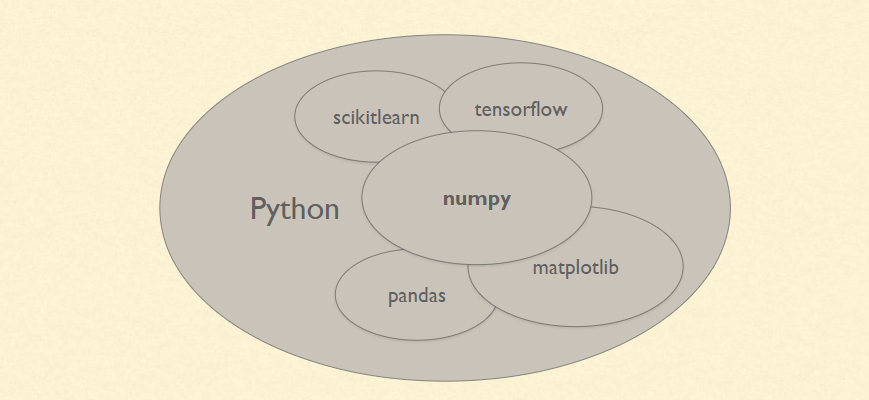


## NumPy

- It is an open source module of Python which provides fast mathematical computation on arrays and matrices.
- `NumPy`’s main object is the homogeneous multidimensional array. 
    - A table with a single type elements (ints, floats, or string).
- `NumPy` provides convenient and optimized C-implementations of essential mathematical operations on vectors.
- [Good overview](https://cloudxlab.com/blog/numpy-pandas-introduction/)

# The difference between Pandas and NumPy

* Elements in `NumPy` arrays are containers accessed by their integer position.
* `Pandas` objects are `NumPy` arrays accessed via user-defined row/column labels.

In [ ]:
arr = np.array([0,1,2,3])
ser = pd.Series([0,1,2,3], index='a b c d'.split())

In [ ]:
arr.item(2)

In [ ]:
arr[2]

In [ ]:
ser['c']

In [ ]:
ser[2]

## `Pandas` is built upon `NumPy`

* To access the underlying numpy array of a DataFrame/Series:
    - use the `.values` attribute.
    - The resulting NumPy array is a copy of the dataframe.

In [ ]:
ser

In [ ]:
ser.values

### Pandas data types

* Understanding data types in Pandas:
    - Leads to better memory and time performance!
    - Avoids hard-to-spot computational errors!
* Pandas tries to guess the correct data-type (and is often wrong!)
* You will often need to explicitly convert between data types.

### Data types

* A **Data Type** is a classification that specifies the type of the values of a column.
* A column's data type determines which operations can be applied to it. 
* What data types do you know?

### Pandas data types

|Pandas dtype|Python type|NumPy type|SQL type|Usage|
|---|---|---|---|---|
|object|NA|object|NA|Mixed types|
|object|str|string, unicode|NA|Text|
|int64|int|int_, int8,...,int64, uint8,...,uint64|INT, BIGINT| Integer numbers|
|float64|float|float_, float16, float32, float64|FLOAT| Floating point numbers|
|bool|bool|bool_|BOOL|True/False values|
|datetime64|NA|datetime64[ns]|DATETIME|Date and time values|
|timedelta[ns]|NA|NA|NA|Differences between two datetimes|
|category|NA|NA|ENUM|Finite list of text values|

### Type conversion and the underlying `NumPy` array(s)
* `.dtypes` method give the data type of each column.
* `.values` on a column return an array of data type in `.dtypes`.
* `.values` on the dataframe gives an array of mixed type (`object`)

In [ ]:
elections.head()

In [ ]:
elections.dtypes

In [ ]:
elections['%'].values

In [ ]:
elections.values

In [ ]:
elections[['Year']].values.dtype

In [ ]:
elections[['Year', '%']].values.dtype

### Caution on conversion of `dtypes`: 

* `NumPy` and `Pandas` don't always guess dtype the same way!
* `Numpy` coerces dtype to optimize memory and read/write speed
* `Pandas` optimizes for "ease of development"

In [ ]:
np.array(['a', 1])

In [ ]:
pd.Series(['a', 1])

In [ ]:
np.array(['a', 1], dtype=np.object)

In [ ]:
pd.Series([1, 1.0])

# Pandas performance and memory management

## `NumPy` vs `Pandas`

* NumPy is optimized for speed and memory consumption
* Pandas makes implementation choices that: 
    - are slow and use a lot of memory,
    - optimize for fast code development.

In [ ]:
ser1 = pd.Series(np.array(range(10**6), dtype=np.int8)).to_frame()
ser2 = pd.Series(range(10**6)).to_frame()

In [ ]:
ser1.info()

In [ ]:
ser2.info()

In [ ]:
arr = np.array(['a'*80]*100)
ser = pd.Series(arr)

In [ ]:
% timeit arr.transpose()

In [ ]:
% timeit ser.transpose()

### Pandas Performance and Memory Management

* Pandas encourages writing 'data processing pipelines':
    - fit together the output of one method to the input of the next method.
    - requires that methods return a *copy*.
* NumPy often works in-place; Pandas copies the underlying array before transforming it!

In [ ]:
elections.tail()

In [ ]:
arr = elections.values
arr

In [ ]:
arr[-1,-1] = 'loss'

In [ ]:
arr

In [ ]:
elections.tail()

### Pandas Performance and Memory Management
* If space is an issue:
    - Use `.values` to return a NumPy array that you can modify in-place.
    - After modification, re-define a dataframe.
    - *warning*: pandas `in-place` keyword returns a copy!
* Otherwise, work with 'small chunks' of the dataframe.

## Example: city of SD employee salaries
* Read data from web
* Look at dataframe basics

In [ ]:
salaries = pd.read_csv('https://transcal.s3.amazonaws.com/public/export/san-diego-2017.csv')

In [ ]:
salaries.head()

In [ ]:
salaries.info()

## Light cleaning
* Fix: `Other Pay` column non-numeric
* Drop useless columns (all one value)

In [ ]:
salaries['Other Pay'].dtype

In [ ]:
# which rows don't contain a decimal?
salaries.loc[salaries['Other Pay'].str.contains('.00') == False]

In [ ]:
# filter out non-numeric entries
salaries = salaries.loc[salaries['Other Pay'].str.contains('.00') == True]

In [ ]:
# convert to float
salaries['Other Pay'] = salaries['Other Pay'].astype(float)

In [ ]:
# drop useless columns
salaries = salaries.drop(['Year', 'Notes', 'Agency'], axis=1)
salaries.head()

In [ ]:
# proportion of jobs that are FT/PT
salaries['Status'].value_counts(normalize=True)

In [ ]:
# Salary Statistics
salaries.describe()

In [ ]:
# are component pays equal to total pay?
(salaries.loc[:, ['Base Pay', 'Overtime Pay', 'Other Pay']].sum(axis=1) == salaries.loc[:,'Total Pay']).all()

In [ ]:
# is total pay plus benefits equal to total pay & benefits column?
(salaries.loc[:, ['Total Pay', 'Benefits']].sum(axis=1) == salaries.loc[:, 'Total Pay & Benefits']).all()

In [ ]:
salaries['Total Pay & Benefits'].plot(kind='hist', bins=10);

In [ ]:
salaries.plot(kind='scatter', x='Base Pay', y='Overtime Pay')

In [ ]:
pd.plotting.scatter_matrix(salaries[['Base Pay', 'Overtime Pay', 'Total Pay']], figsize=(8,8));

In [ ]:
# who makes a lot of overtime?
salaries.loc[salaries['Overtime Pay'] > 100000]